## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**

The average car price rose just under $1800 in 2019, then just over $3301 in 2020, and then an incredible $6220 in 2021. That's the kind of rate of increase that gets you to new car prices hitting $47,077 in December 2021. The reason for price rise is a result of the COVID-19 pandemic, supply-chain problems, and a chip shortage. An acute chip shortage and an increased demand and reduced supply of raw materials led to the price rise of cars. 

Current scenario may worsen due to the Russia Ukraine war. Russia produces 40% of mined palladium and Ukraine makes more than 90% of the world’s supply of neon gas — materials vital to the chip sector.


## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [131]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing


%matplotlib inline

In [132]:
#Read in data
df =pd.read_csv(r'D:\WSU\WSU Classes\Intro to data science\Assignments\Assignment 2\auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [133]:
##your code here
#we are using info function to get more information about the dataset
print(df.info())

#Conclusion ------->>>> viewing the initial data bore, stroke, horse_power, peak_rpm should be some numeric datatype.
#But they are actually object datatype (which represents string datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

In [134]:
#We are trying to filter rows that have missing values as "?"
print(df.loc[df['bore'] == '?'])
print(df.loc[df['stroke'] == '?'])
print(df.loc[df['horse_power'] == '?'])
print(df.loc[df['peak_rpm'] == '?'])

#Conclusion------>>>> We have quite a few rows that are having "?" as values which resulted in the columns to be object datatype

   fuel_type       body  wheel_base  length  width  heights  curb_weight  \
52       gas  hatchback        95.3   169.0   65.7     49.6         2380   
53       gas  hatchback        95.3   169.0   65.7     49.6         2380   
54       gas  hatchback        95.3   169.0   65.7     49.6         2385   
55       gas  hatchback        95.3   169.0   65.7     49.6         2500   

   engine_type cylinders  engine_size bore stroke  comprassion horse_power  \
52       rotor       two           70    ?      ?          9.4         101   
53       rotor       two           70    ?      ?          9.4         101   
54       rotor       two           70    ?      ?          9.4         101   
55       rotor       two           80    ?      ?          9.4         135   

   peak_rpm  city_mpg  highway_mpg  price  
52     6000        17           23  10945  
53     6000        17           23  11845  
54     6000        17           23  13645  
55     6000        16           23  15645  
   fuel_

### Replace '?' with None


### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [135]:
#replacing all the column values having '?' as data to None
df['bore'].replace({'?': None}, inplace=True)
df['stroke'].replace({'?': None}, inplace=True)
df['horse_power'].replace({'?': None}, inplace=True)
df['peak_rpm'].replace({'?': None}, inplace=True)

In [136]:
#Using astype function to replace change the datatype of the columns
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horse_power'] = df['horse_power'].astype('float64')
df['peak_rpm'] = df['peak_rpm'].astype('float64')

In [137]:
#We are checking the info function once again to verify if the columns have successfully changed the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [138]:
## Your code here
#we are using drop function to drop the three above mentioned columns
df.drop("body", axis=1, inplace=True)
df.drop("engine_type", axis=1, inplace=True)
df.drop("cylinders", axis=1, inplace=True)

In [139]:
df2=df

In [140]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [141]:
## your code goes here
df2.dropna(axis='index',inplace=True)

In [142]:
df2.isnull().sum()


fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [143]:
## Your code goes here
# le = preprocessing.LabelEncoder()
# df2['fuel_type_cat'] = le.fit_transform(df2['fuel_type'])
df2['fuel_type'].unique()
#print(df2)

df2=pd.get_dummies(df2, columns = ['fuel_type'],drop_first=True)
print(df2.head())

   wheel_base  length  width  heights  curb_weight  engine_size  bore  stroke  \
0        88.6   168.8   64.1     48.8         2548          130  3.47    2.68   
1        88.6   168.8   64.1     48.8         2548          130  3.47    2.68   
2        94.5   171.2   65.5     52.4         2823          152  2.68    3.47   
3        99.8   176.6   66.2     54.3         2337          109  3.19    3.40   
4        99.4   176.6   66.4     54.3         2824          136  3.19    3.40   

   comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price  \
0          9.0        111.0    5000.0        21           27  13495   
1          9.0        111.0    5000.0        21           27  16500   
2          9.0        154.0    5000.0        19           26  16500   
3         10.0        102.0    5500.0        24           30  13950   
4          8.0        115.0    5500.0        18           22  17450   

   fuel_type_gas  
0              1  
1              1  
2              1  
3         

In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [145]:
## Your EDA should start here
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


The column has all integer or float column

In [146]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


We come to an understanding that highest price of the car is around 45400$ and the least car price is around 5000$. And also we get an idea about the max, min, count of other attributes

In [147]:
df2.shape

(195, 15)

The data has 195 rows and 15 columns in the dataset

array([[<AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'heights'}>],
       [<AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>,
        <AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'comprassion'}>,
        <AxesSubplot:title={'center':'horse_power'}>,
        <AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>],
       [<AxesSubplot:title={'center':'highway_mpg'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'fuel_type_gas'}>, <AxesSubplot:>]],
      dtype=object)

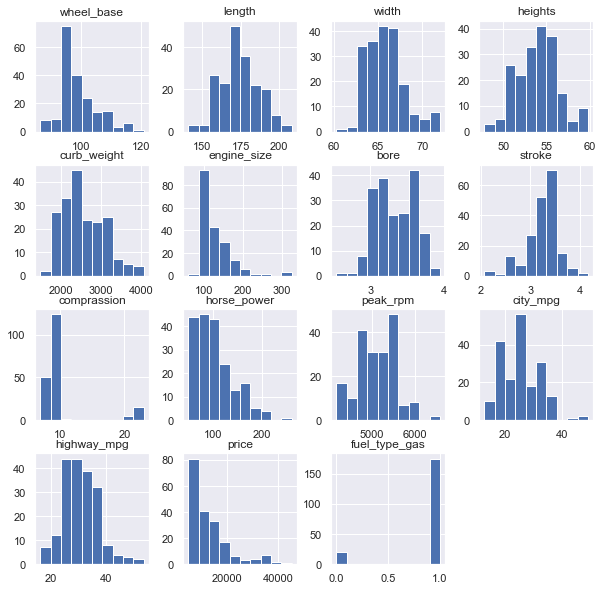

In [148]:
df2.hist(grid=True,figsize=(10,10))

The data is bit under represented like the data mostly has cars run gas and very few diesel cars
The fairly well distributed length, width, heights, curb_weight, bore, horse_power, peak_rpm, highway_mpg
There are very few highly priced cars which is again an under representation of high priced cars

In [149]:
#we try to find the sum of all the rows of the columns that have null values
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

The data is pretty clean and does not have any columns with null value

['wheel_base', 'length', 'width', 'heights', 'curb_weight', 'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas']


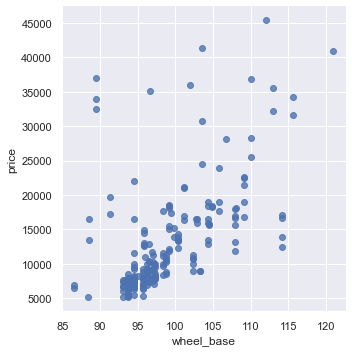

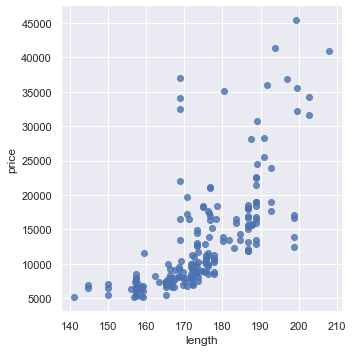

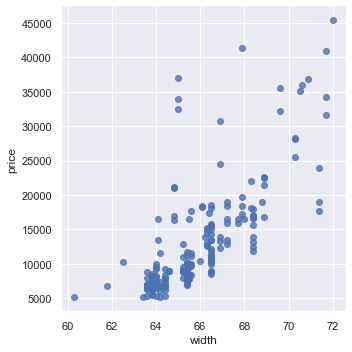

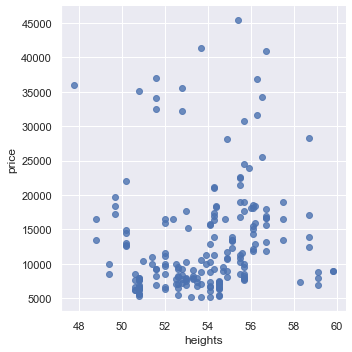

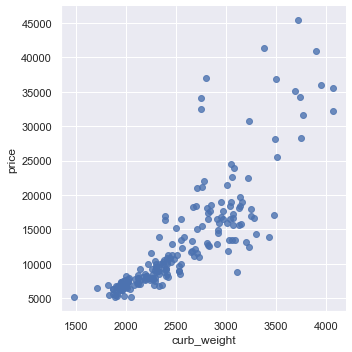

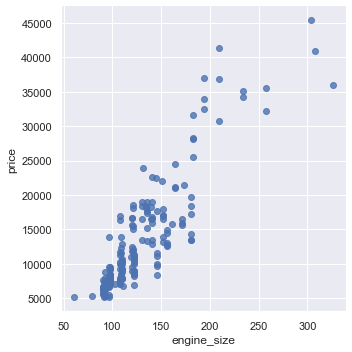

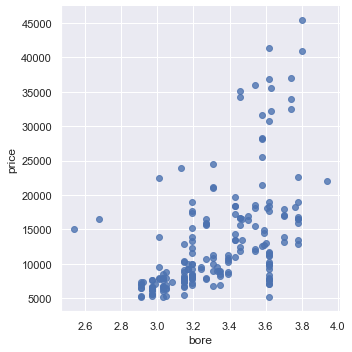

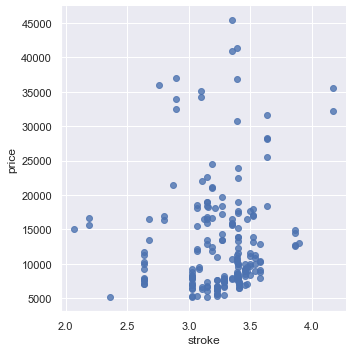

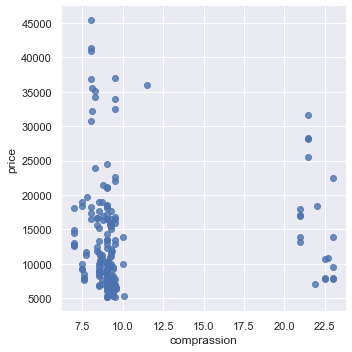

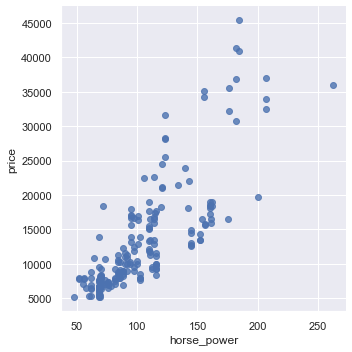

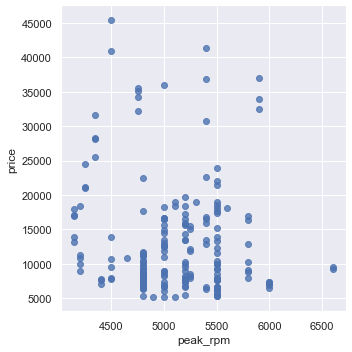

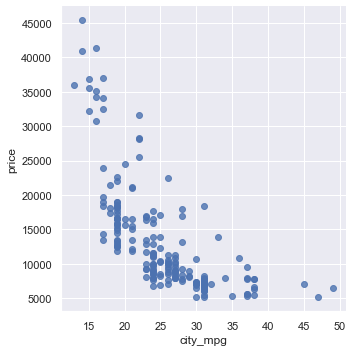

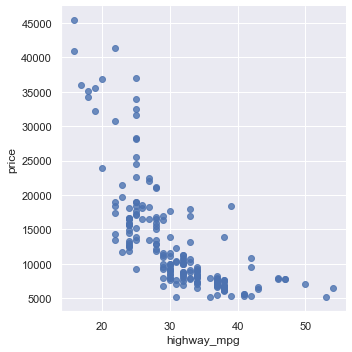

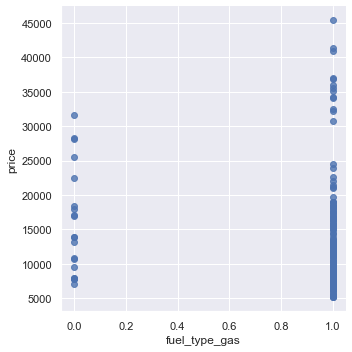

In [150]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df2_columns = df2.columns
df2_columns = list(df2_columns)
print(df2_columns)

for i in df2_columns:
    if (i!='price'):
#we draw the impact on price for various features in the data. So we try to find a trend of data using for various features
        sns.lmplot(i, 'price', df2,fit_reg=False)

Fuel_type - We have more data point for gas vehicles than diesel vehicles, and the gas data has prices from the lowest to the highest. It is difficult to point out if there are outliers or not.

Wheel_base- The relationship is almost directly linear with price, the dataset has more data about cars with smaller wheel base and lower price. there might be some outliers where the wheel_base is around 90 and price is around 35000

Length -  This has a preety good linear direct relationship with more representation of data from 155 to 180 in length. Lesser chance of having outliers

Curb_weight & width - This also has a linear direct relationship with with more data points for lesser curb weight and lesser width vehicles

Engine size and horse_power- They has a directly proportional relationship with price. But it is hard to say if the data points on extreme right are outliers or not, they might simply be underrepresented.

Bore and stroke - They do not have a very linear relationship with price.

Comprassion - The dataset has more data points with comprassion around 5-10 or 21-24. It is hard to say if the vehicles with lesser comprassion and higher price are outliers or just under represented.

City_mpg and highway_mpg - They have inversely proportinal relationship with price. But it is again hard to confirm about outliers.

<AxesSubplot:>

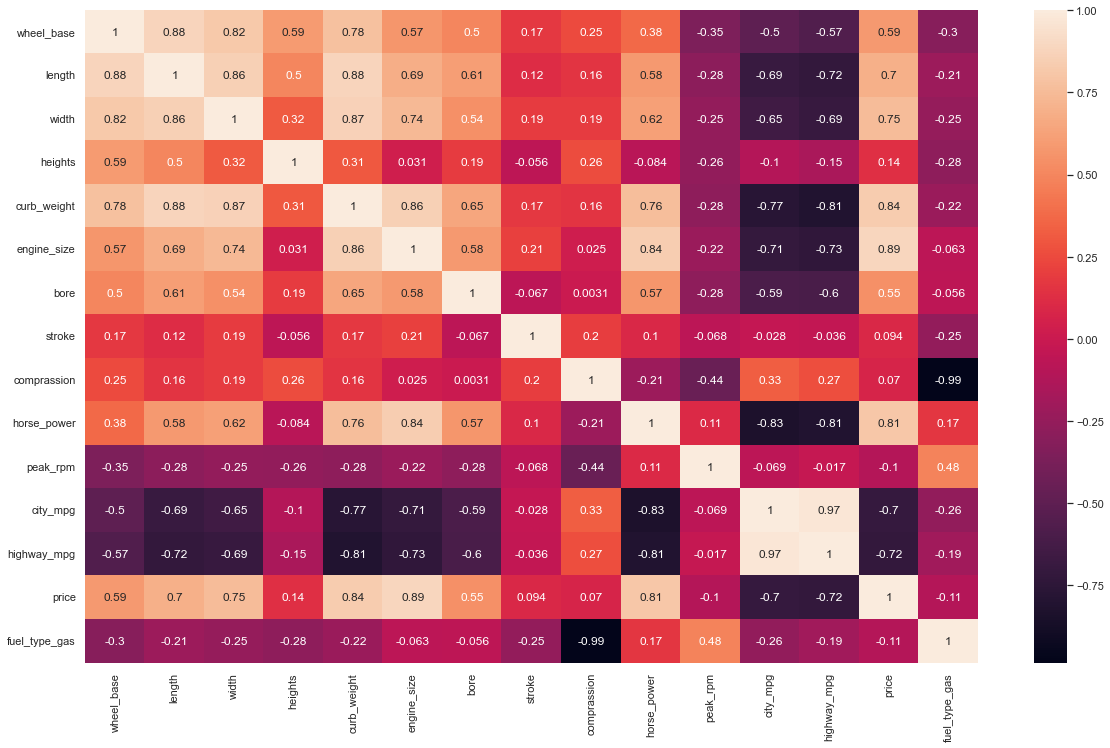

In [151]:
Var_Corr = df2.corr()
# plot the heatmap and annotation on it
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Fuel_type - It has highly correlated with Comprassion and negative linearity with horse_power and peak_rpm.
Wheel_base, length, width, curb_weight - they are highly correlated with each other whereas all of them are negatively correlated with peak_rpm, city_mpg and highway_mpg.


Curb_weight and engine_size are highly correlated to each other

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [ ]:
##Your code goes here

In [152]:
price_index=df2_columns.index('price')
y= df2.iloc[:,price_index].values.reshape(-1,1)
x= df2.iloc[:,df2.columns != 'price'].values
X=sm.add_constant(x)
print(X)

[[  1.   88.6 168.8 ...  21.   27.    1. ]
 [  1.   88.6 168.8 ...  21.   27.    1. ]
 [  1.   94.5 171.2 ...  19.   26.    1. ]
 ...
 [  1.  109.1 188.8 ...  18.   23.    1. ]
 [  1.  109.1 188.8 ...  26.   27.    0. ]
 [  1.  109.1 188.8 ...  19.   25.    1. ]]


In [153]:
model1 = sm.OLS(y,X).fit()
model1.summary(xname=['intercept', 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg','fuel_type_gas'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           5.84e-69
Time:                        21:29:49   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      -4.45e+04   1.84e+04     -2.419      0.017   -8.08e+04   -8194.301
wheel_base       39.5305    103.549      0.382      0.703    -164.796     243.857
length          -60.6333     58.500     -1.036      0.301    -176.068      54.801
width           603.6414    254.539      2.372      0.019     101.377    1105.906
heights         329.5669    140.947      2.338      0.020      51.446     607.688
curb_weight       1.1798      1.738      0.679      0.498      -2.249       4.609
engine_size     138.4537     16.111      8.594      0.000     106.662     170.245
bore          -1208.4137   1206.683     -1.001      0.318   -3589.479    1172.651
stroke        -3706.0531    874.513     -4.238      0.000   -5431.669   -1980.437
comprassion    -617.1497    446.452     -1.382      0.169   -1498.103     263.804
horse_power      34.6328     18.049      1.919      0.057      -0.982      70.248
peak_rpm          2.5517      0.709      3.599      0.000       1.153       3.951
city_mpg       -288.2868    180.791     -1.595      0.113    -645.030      68.456
highway_mpg     316.6334    163.540      1.936      0.054      -6.069     639.336
fuel_type_gas -1.173e+04   6002.268     -1.955      0.052   -2.36e+04     110.854
==============================================================================
Omnibus:                       18.136   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.211
Skew:                           0.240   Prob(JB):                     1.03e-12
Kurtosis:                       5.562   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
cols = ['intercept', 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg','fuel_type_gas']
model1.conf_int(alpha = 0.1, cols=None)

array([[-7.49194850e+04, -1.40795037e+04],
       [-1.31674276e+02,  2.10735300e+02],
       [-1.57355464e+02,  3.60889003e+01],
       [ 1.82795801e+02,  1.02448692e+03],
       [ 9.65302359e+01,  5.62603582e+02],
       [-1.69305674e+00,  4.05274758e+00],
       [ 1.11815672e+02,  1.65091659e+02],
       [-3.20349937e+03,  7.86672056e+02],
       [-5.15194065e+03, -2.26016552e+03],
       [-1.35529732e+03,  1.20997885e+02],
       [ 4.79112181e+00,  6.44745274e+01],
       [ 1.37943913e+00,  3.72390661e+00],
       [-5.87200631e+02,  1.06270917e+01],
       [ 4.62420082e+01,  5.87024849e+02],
       [-2.16569346e+04, -1.80907793e+03]])

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

1. The intercept represent the mean value of the response variable when all the predictor values are zero
2. How many variables are statistically significant? - 8 namely width, heights, engine_size, storke, horse_power, peak_rpm, highway_mpg, fuel_type_gas

In [155]:
3. #variance of the model
model1.mse_resid

9802534.782392945

4. The coefficient of determination is the R squared which is equal to 0.860. It means 86 percent of the response variable is predictable from the predictor variables. 
5. F-statistics determine the significance of the model and the predictor variables. If the F statistics value is greater then f critical value then we can reject the null hypothesis. It also state that atleast one of the coefficient is different from 0 at significance level alpha

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

In [156]:
df2.columns

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')

In [157]:
df2 = df2.drop(['wheel_base', 'length', 'curb_weight',
        'bore', 'comprassion', 'city_mpg'],axis=1)
df2.head()

,width,heights,engine_size,stroke,horse_power,peak_rpm,highway_mpg,price,fuel_type_gas
0,64.1,48.8,130,2.68,111.0,5000.0,27,13495,1
1,64.1,48.8,130,2.68,111.0,5000.0,27,16500,1
2,65.5,52.4,152,3.47,154.0,5000.0,26,16500,1
3,66.2,54.3,109,3.40,102.0,5500.0,30,13950,1
4,66.4,54.3,136,3.40,115.0,5500.0,22,17450,1


In [158]:
df2 = df2.drop(['highway_mpg'],axis=1)

In [159]:
y=df2.iloc[:,df2.columns=='price'].values.reshape(-1,1)
x2=sm.add_constant(df2.iloc[:,df2.columns!='price'].values)
#x2= df2.iloc[:,df2.columns != 'price'].values
#X=sm.add_constant(x)

In [160]:
model2 = sm.OLS(y,x2).fit()
model2.summary(xname=['intercept', 'width', 'heights',
       'engine_size', 'stroke', 'horse_power',
       'peak_rpm','fuel_type_gas'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     156.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.17e-74
Time:                        21:31:06   Log-Likelihood:                -1842.3
No. Observations:                 195   AIC:                             3701.
Df Residuals:                     187   BIC:                             3727.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept     -5.609e+04   1.14e+04     -4.907      0.000   -7.86e+04   -3.35e+04
width           522.8037    180.839      2.891      0.004     166.056     879.551
heights         272.7640    109.058      2.501      0.013      57.622     487.906
engine_size     131.4010     13.698      9.593      0.000     104.378     158.424
stroke        -2925.4497    773.551     -3.782      0.000   -4451.457   -1399.442
horse_power      38.8670     13.808      2.815      0.005      11.627      66.107
peak_rpm          2.3747      0.637      3.730      0.000       1.119       3.631
fuel_type_gas -3590.6901    929.794     -3.862      0.000   -5424.924   -1756.456
==============================================================================
Omnibus:                       18.689   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.811
Skew:                           0.209   Prob(JB):                     3.78e-14
Kurtosis:                       5.726   Cond. No.                     2.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. The intercept represent the mean value of the response variable when all the predictor values are zero
2. How many variables are statistically significant? - all are statistically significant

In [161]:
3. #variance of the model
model2.mse_resid

9817316.784458345

4. The coefficient of determination is the R squared which is equal to 0.854. It means 85.4 percent of the response variable is predictable from the predictor variables. Adjusted R square is 0.849 for both the model 1 and model 2
5. F-statistics determine the significance of the model and the predictor variables. If the F statistics value is greater then f critical value then we can reject the null hypothesis. It also state that atleast one of the coefficient is different from 0 at significance level alpha

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

H0: The reduced model is better

Ha: The full model is better

In [162]:
##your code goes here
anova_lm(model2,model1)

c:\users\kaustub saha\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,187.0,1.835838e+09,0.0,NaN,NaN,NaN
1,180.0,1.764456e+09,7.0,7.138198e+07,1.040285,0.404632


Anova is analysis of variance, if F value is nearly equal to 1, no true variance exists between the two model. In our case, the F value is almost equal to 1.



**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

# Assumption of Independence

Assumption of independence - One assumption of our linear regression model is that the error terms are independent. A
common violation of this assumption occurs when each error term is related to its
immediate predecessor

In [163]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
print('The Durbin watson value for model 1',statsmodels.stats.stattools.durbin_watson(model1.resid))
print('The Durbin watson value for model 2',statsmodels.stats.stattools.durbin_watson(model2.resid))

The Durbin watson value for model 1 0.9784765574137851
The Durbin watson value for model 2 0.9374938889663907


durbin_watson (D) value can be between 0-4, if D close to 2, it suggests that the dependent variables are not autocorrelated. Here in this example, the value of D are very close to 1, which suggests that the values are autocorrelated.

No the Assumption of independence do not hold here.

# Assumption of Normality

Assumption of normality: the null hypothesis is that the errors are normally distributed

In [164]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model2.resid)
lzip(name, test)

[('Jarque-Bera', 61.81076319483906),
 ('Chi^2 two-tail prob.', 3.7841061552044866e-14),
 ('Skew', 0.20885390960827901),
 ('Kurtosis', 5.726352641318152)]

Jarque-Bera signifies the normal distribution of the errors. This test matches the skewness and kurtosis A normal distribution has a skew of zero (i.e. it’s perfectly symmetrical around the mean) and a kurtosis of three.

A value of JB as high as 61.8107 means that Null hypothesis can be rejected and the data is not normally distributed. As the value of kurtosis is also much higher than 3, it suggests that the data is not normalized in the tail.

No, the assumption of normality do not hold good here.

Text(0.5, 1.0, 'Model2 Residuals Q-Q Plot')

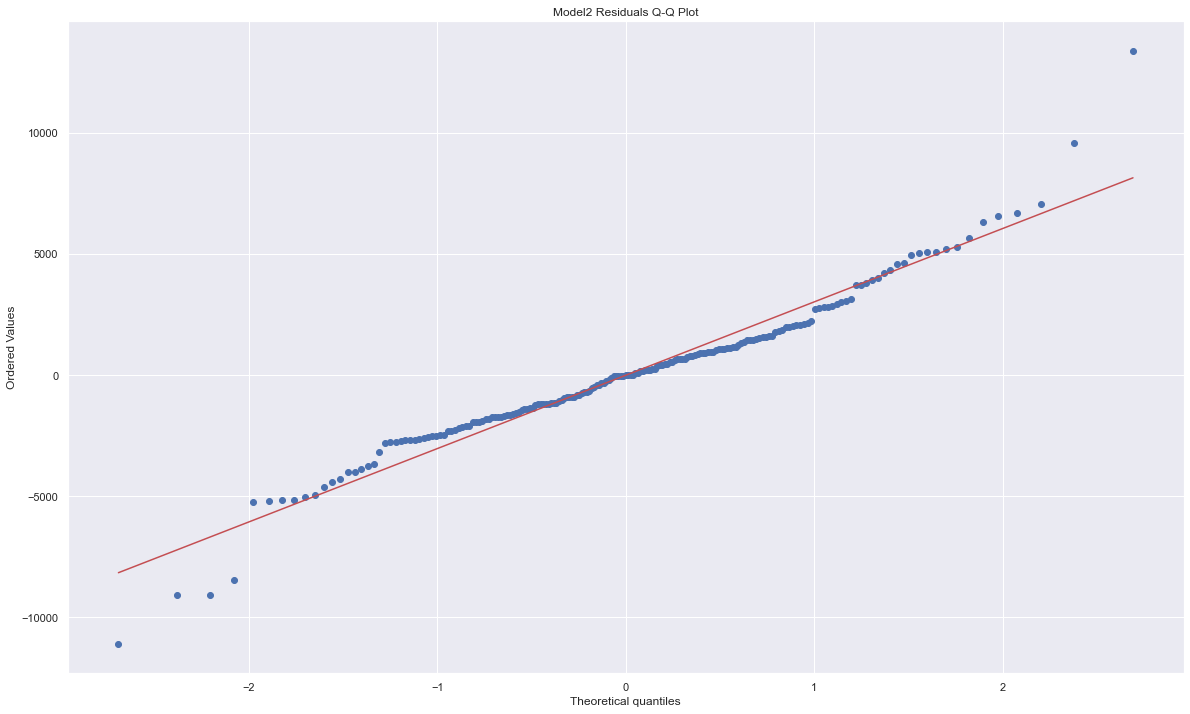

In [165]:
stats.probplot(model2.resid, dist="norm", plot= plt)
plt.title("Model2 Residuals Q-Q Plot")

# Assumption of homoscedasticity

One of the key assumptions of linear regression is that the residuals are distributed with equal variance at each level of the predictor variable. This assumption is known as homoscedasticity. When this assumption is violated, we say that heteroscedasticity is present in the residuals. When this occurs, the results of the regression become unreliable. If the residuals become more spread out at higher values in the plot, this is a tell-tale sign that heteroscedasticity is present.


In [166]:
##your code goes here
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 72.87380933011752),
 ('p-value', 3.8717981474842934e-13),
 ('f-value', 15.940657387696879),
 ('f p-value', 2.369293559860226e-16)]

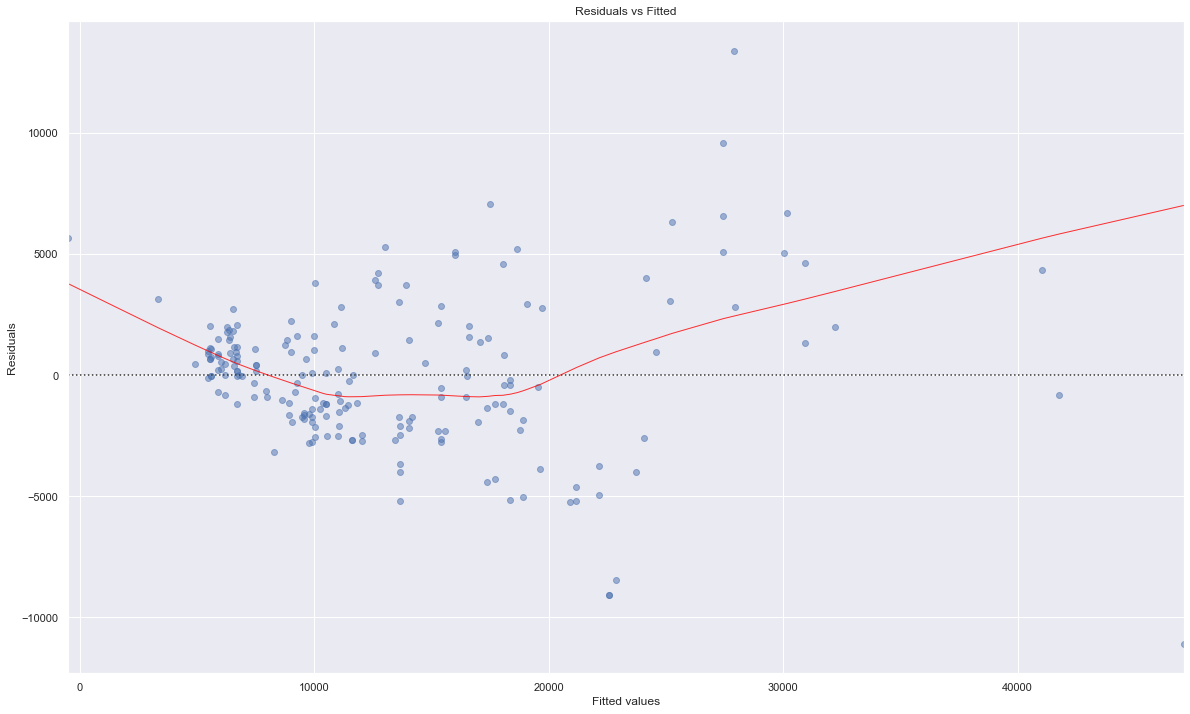

In [167]:
# fitted values
model_fitted_y = model2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='price', data=df2, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

As stated above if the plots are spread out in at higher values it leads to  heteroscedasticity. And the same thing is happening in the above graph. The values are very merged at lower values and spread out at higher values.

No, the assumption for homoscedasticity does not hold good.

**5. Is there Multicollinearity in your data?**

In [ ]:
##your code goes here

In [168]:
# Change array to dataframe. For each X, calculate VIF and save in dataframe. Anything above 10 will suggest multicollinearity
x2_df=pd.DataFrame(x2)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2_df.values, i) for i in range(x2_df.shape[1])]
vif["Feature"] = x2_df.columns

vif.round(2)

,VIF Factor,Feature
0,2595.92,0
1,2.94,1
2,1.35,2
3,6.37,3
4,1.17,4
5,5.40,5
6,1.76,6
7,1.58,7
